In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/014648.png


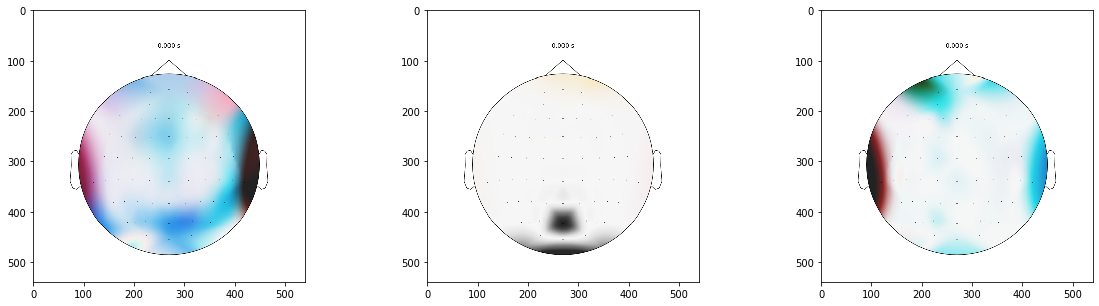

In [3]:
h.plot_examples()

In [4]:
def build_model(optimizer, loss, name):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [5]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [6]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [7]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_vgg_like_3by3_256_c_100')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0

In [8]:
r = model.fit_generator(train_it, epochs=100, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/100
173/173 [==============================] - 124s 717ms/step - loss: 1.0997 - accuracy: 0.3294 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
173/173 [==============================] - 117s 677ms/step - loss: 1.0987 - accuracy: 0.3311 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/100
173/173 [==============================] - 117s 678ms/step - loss: 1.0987 - accuracy: 0.3307 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
173/173 [==============================] - 117s 677ms/step - loss: 1.0987 - accuracy: 0.3262 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/100
173/173 [==============================] - 117s 677ms/step - loss: 1.0986 - accuracy: 0.3319 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/100
173/173 [==============================] - 117s 678ms/step - loss: 1.0953 - accuracy: 0.3493 - val_loss: 1.0697 - val_accuracy: 0.4159
Epoch 7/100
173/173 [==============================] - 117s 677ms/step - loss: 1.0454 - accuracy: 0.4356 - val_loss: 0

173/173 [==============================] - 118s 681ms/step - loss: 0.1185 - accuracy: 0.9537 - val_loss: 0.2636 - val_accuracy: 0.9190
Epoch 57/100
173/173 [==============================] - 117s 678ms/step - loss: 0.1220 - accuracy: 0.9524 - val_loss: 0.2604 - val_accuracy: 0.9210
Epoch 58/100
173/173 [==============================] - 117s 679ms/step - loss: 0.1124 - accuracy: 0.9552 - val_loss: 0.2686 - val_accuracy: 0.9190
Epoch 59/100
173/173 [==============================] - 118s 681ms/step - loss: 0.1159 - accuracy: 0.9537 - val_loss: 0.2590 - val_accuracy: 0.9200
Epoch 60/100
173/173 [==============================] - 118s 680ms/step - loss: 0.1139 - accuracy: 0.9567 - val_loss: 0.2518 - val_accuracy: 0.9219
Epoch 61/100
173/173 [==============================] - 118s 679ms/step - loss: 0.1122 - accuracy: 0.9557 - val_loss: 0.2537 - val_accuracy: 0.9254
Epoch 62/100
173/173 [==============================] - 118s 681ms/step - loss: 0.1145 - accuracy: 0.9564 - val_loss: 0.2597 

In [9]:
evaluate = model.evaluate_generator(test_it)

In [10]:
y_prob = model.predict_generator(test_it)

In [11]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_vgg_like_3by3_256_c_100')

model saved, path: models/cnn_topomap_classification_model_vgg_like_3by3_256_c_100.h5


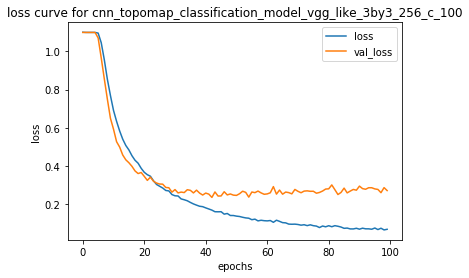

In [12]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_vgg_like_3by3_256_c_100')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_vgg_like_3by3_256_c_100.png')

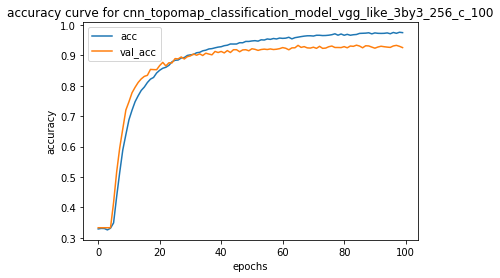

In [13]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_vgg_like_3by3_256_c_100')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_vgg_like_3by3_256_c_100.png')